Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("../data/amazon_sales_report.csv", index_col=[0])

In [ ]:
df.info()
df.describe()

Limpeza do Dataframe

In [4]:
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

In [5]:
colunas_sem_nome = [col for col in df.columns if 'Unnamed' in col]
df = df.drop(columns=colunas_sem_nome)

In [6]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns = df.columns.str.lower().str.replace("-", "_")

In [7]:
df = df.drop_duplicates()

In [ ]:
df.to_csv("../data/dataset_limpo.csv", index=False)

Análise exploratória de dados

In [ ]:
vendas_por_data = df.groupby('date')['amount'].sum()

plt.figure(figsize=(12,6))
plt.plot(vendas_por_data.index, vendas_por_data.values)
plt.title('Vendas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Total de Vendas')
plt.show()

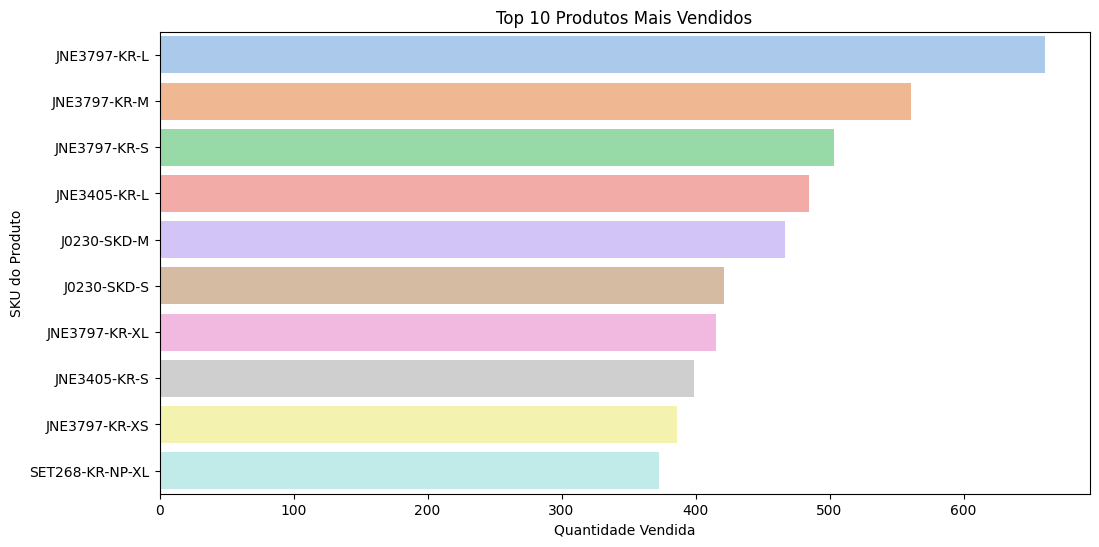

In [10]:
vendas_por_produto = df.groupby('sku')['qty'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=vendas_por_produto.values, y=vendas_por_produto.index, palette='pastel')
plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('Quantidade Vendida')
plt.ylabel('SKU do Produto')
plt.show()

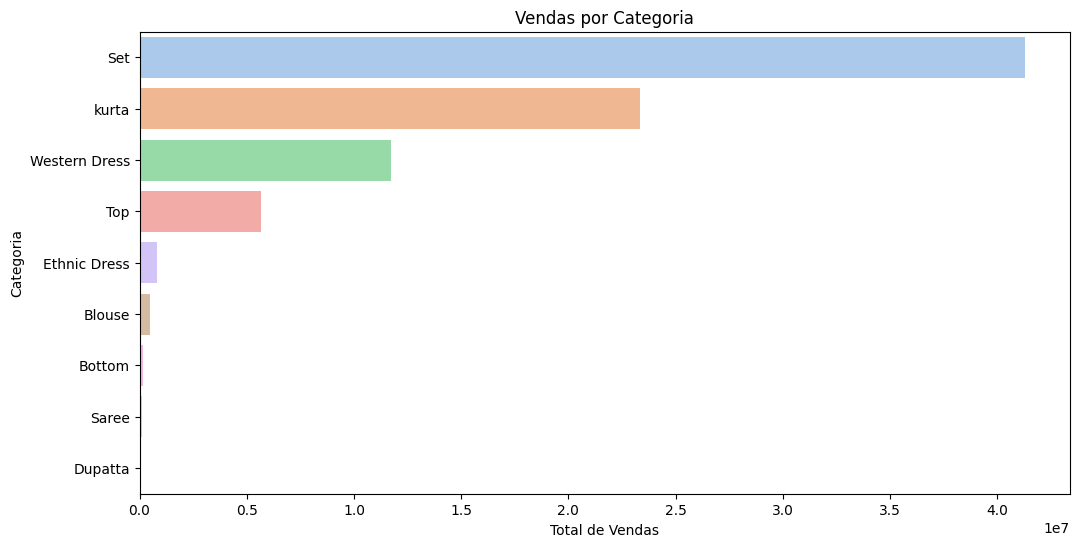

In [ ]:
vendas_por_categoria = df.groupby('category')['amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=vendas_por_categoria.values, y=vendas_por_categoria.index, palette='pastel')
plt.title('Vendas por Categoria')
plt.xlabel('Total de Vendas')
plt.ylabel('Categoria')
plt.show()

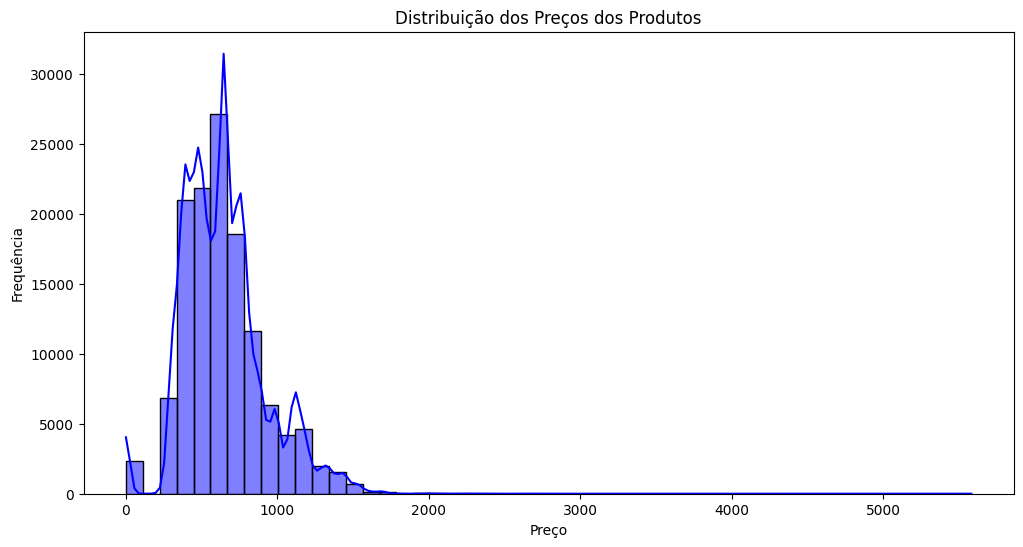

In [9]:
plt.figure(figsize=(12,6))
sns.histplot(df['amount'], bins=50, kde=True, color='blue')
plt.title('Distribuição dos Preços dos Produtos')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()